In [1]:
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor,plot_tree
from sklearn.metrics import classification_report,accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [13]:
df = pd.read_csv('Fraud_check.csv')
df.head()

<IPython.core.display.Javascript object>

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [14]:
df.shape

(600, 6)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [16]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


<IPython.core.display.Javascript object>

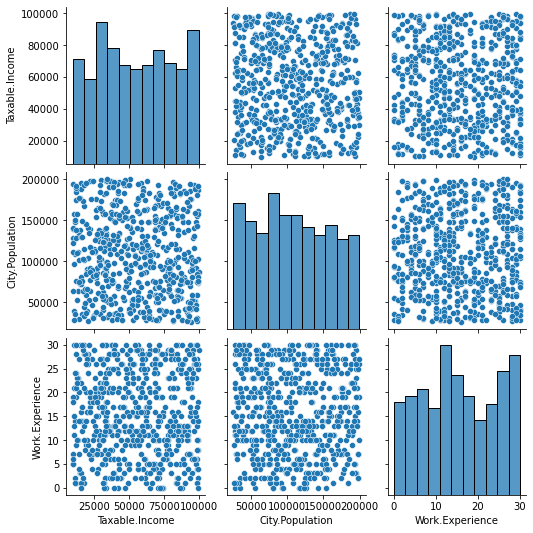

In [17]:
sns.pairplot(df)

# Data manipulation

In [20]:
df['Undergrad']=pd.get_dummies(df['Undergrad'],drop_first=True)
df['Urban']=pd.get_dummies(df['Urban'],drop_first=True)
df

<IPython.core.display.Javascript object>

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,Single,68833,50047,10,1
1,1,Divorced,33700,134075,18,1
2,0,Married,36925,160205,30,1
3,1,Single,50190,193264,15,1
4,0,Married,81002,27533,28,0
...,...,...,...,...,...,...
595,1,Divorced,76340,39492,7,1
596,1,Divorced,69967,55369,2,1
597,0,Divorced,47334,154058,0,1
598,1,Married,98592,180083,17,0


In [23]:
lab_enco = LabelEncoder()
df['Marital.Status']=lab_enco.fit_transform(df['Marital.Status'])
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [25]:
income_status = []

for i in df['Taxable.Income']:
    if i>=30000:
        income_status.append('Good')
    else:
        income_status.append('Risky')

df['income_status'] = income_status
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,income_status
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,Good
596,1,0,69967,55369,2,1,Good
597,0,0,47334,154058,0,1,Good
598,1,1,98592,180083,17,0,Good


In [26]:
df['income_status'].value_counts()

Good     476
Risky    124
Name: income_status, dtype: int64

In [27]:
x = df.iloc[:,[0,1,3,4,5]]
y = df.iloc[:,-1]

# DT model fitting

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print(x_train)
print(x_test)
print(y_train)
print(y_test)

     Undergrad  Marital.Status  City.Population  Work.Experience  Urban
593          0               0           131963               10      1
531          1               1           124440               14      1
353          1               1           141622               29      0
332          1               0            84132                1      0
534          1               1            91567               13      1
..         ...             ...              ...              ...    ...
71           0               2           105680               22      0
106          1               2            58535               20      1
270          0               1           130680                5      0
435          0               0           111774                4      1
102          1               0            91488               23      0

[450 rows x 5 columns]
     Undergrad  Marital.Status  City.Population  Work.Experience  Urban
110          0               2          

In [29]:
model = DecisionTreeClassifier(criterion='gini',max_depth=2)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [30]:
y_pred = model.predict(x_test)

In [32]:
np.mean(y_pred==y_test)

<IPython.core.display.Javascript object>

0.76

<IPython.core.display.Javascript object>

[Text(0.5, 0.8333333333333334, 'X[2] <= 60294.5\ngini = 0.323\nsamples = 450\nvalue = [359, 91]'),
 Text(0.25, 0.5, 'X[3] <= 6.5\ngini = 0.249\nsamples = 96\nvalue = [82, 14]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.292\nsamples = 79\nvalue = [65, 14]'),
 Text(0.75, 0.5, 'X[2] <= 64532.5\ngini = 0.34\nsamples = 354\nvalue = [277, 77]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.33\nsamples = 346\nvalue = [274, 72]')]

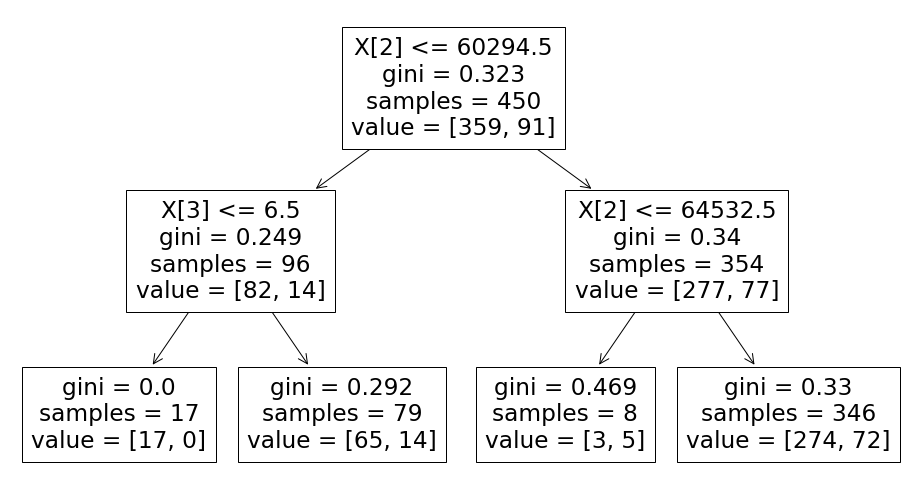

In [33]:
plt.figure(figsize=(16,9))
plot_tree(model)

<IPython.core.display.Javascript object>

[Text(0.5, 0.8333333333333334, 'Taxable.Income <= 60294.5\ngini = 0.323\nsamples = 450\nvalue = [359, 91]\nclass = Good'),
 Text(0.25, 0.5, 'City.Population <= 6.5\ngini = 0.249\nsamples = 96\nvalue = [82, 14]\nclass = Good'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]\nclass = Good'),
 Text(0.375, 0.16666666666666666, 'gini = 0.292\nsamples = 79\nvalue = [65, 14]\nclass = Good'),
 Text(0.75, 0.5, 'Taxable.Income <= 64532.5\ngini = 0.34\nsamples = 354\nvalue = [277, 77]\nclass = Good'),
 Text(0.625, 0.16666666666666666, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]\nclass = risky'),
 Text(0.875, 0.16666666666666666, 'gini = 0.33\nsamples = 346\nvalue = [274, 72]\nclass = Good')]

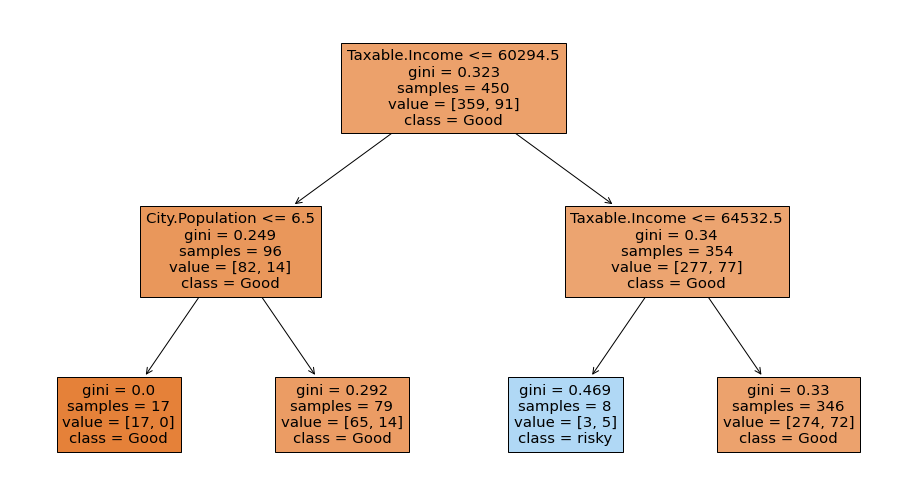

In [35]:
plt.figure(figsize=(16,9))
cn=['Good','risky']
plot_tree(model,feature_names=df.columns,class_names=cn,filled=True)

In [36]:
pd.crosstab(y_test,y_pred)

<IPython.core.display.Javascript object>

col_0,Good,Risky
income_status,,
Good,114,3
Risky,33,0
